In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

file_path = "/Users/monicachaganti/Desktop/GlobalTemperatures.xls"
df = pd.read_excel(file_path, engine="xlrd", parse_dates=["Date"], index_col="Date")

print(df.head())


            LandAverageTemperature  LandAverageTemperatureUncertainty  \
Date                                                                    
1750-01-01                   3.034                              3.574   
1750-02-01                   3.083                              3.702   
1750-03-01                   5.626                              3.076   
1750-04-01                   8.490                              2.451   
1750-05-01                  11.573                              2.072   

            LandMaxTemperature  LandMaxTemperatureUncertainty  \
Date                                                            
1750-01-01                 NaN                            NaN   
1750-02-01                 NaN                            NaN   
1750-03-01                 NaN                            NaN   
1750-04-01                 NaN                            NaN   
1750-05-01                 NaN                            NaN   

            LandMinTemperature  

In [4]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels tensorflow keras xgboost


Note: you may need to restart the kernel to use updated packages.


Predicting Future Temperature Using Linear Regression

Model Performance:
Mean Absolute Error (MAE): 3.7980
 Mean Squared Error (MSE): 18.5315
 R-squared (R²): 0.0001

Future Temperature Predictions:
    Year  Predicted Temperature (°C)
0   2025                    9.092919
1   2030                    9.118911
2   2035                    9.144902
3   2040                    9.170894
4   2045                    9.196885
5   2050                    9.222877
6   2055                    9.248868
7   2060                    9.274860
8   2065                    9.300851
9   2070                    9.326843
10  2075                    9.352834
11  2080                    9.378826


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


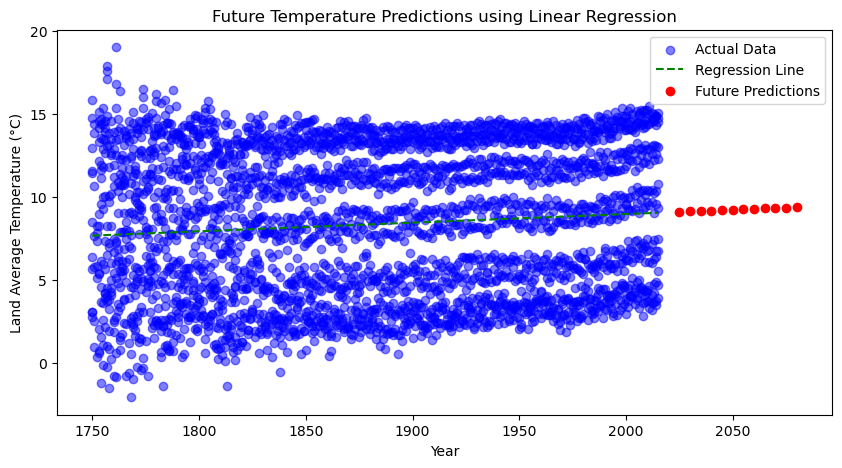

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "/Users/monicachaganti/Desktop/GlobalTemperatures.xls"
df = pd.read_excel(file_path)

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")  

df = df.dropna(subset=["Date"])

df["Year"] = df["Date"].dt.year

df_clean = df[["Year", "LandAverageTemperature"]].dropna()

X = df_clean[["Year"]]
y = df_clean["LandAverageTemperature"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f" Mean Squared Error (MSE): {mse:.4f}")
print(f" R-squared (R²): {r2:.4f}")

future_years = np.arange(2025, 2085, 5).reshape(-1, 1)
future_predictions = model.predict(future_years)

future_results = pd.DataFrame({"Year": future_years.flatten(), "Predicted Temperature (°C)": future_predictions})
print("\nFuture Temperature Predictions:")
print(future_results)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Actual Data", color="blue", alpha=0.5)
plt.plot(X, model.predict(X), color="green", linestyle="dashed", label="Regression Line")
plt.scatter(future_years, future_predictions, color="red", marker="o", label="Future Predictions")
plt.xlabel("Year")
plt.ylabel("Land Average Temperature (°C)")
plt.title("Future Temperature Predictions using Linear Regression")
plt.legend()
plt.show()


ARIMA (AutoRegressive Integrated Moving Average)

In [31]:
print(df.columns)

Index(['Date', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'Year'],
      dtype='object')


In [33]:
import pandas as pd

df = pd.read_excel("/Users/monicachaganti/Desktop/GlobalTemperatures.xls", parse_dates=["Date"])

df.set_index("Date", inplace=True)

print(df.index)


Index(['1750-01-01', '1750-02-01', '1750-03-01', '1750-04-01', '1750-05-01',
       '1750-06-01', '1750-07-01', '1750-08-01', '1750-09-01', '1750-10-01',
       ...
       '2015-03-01 00:00:00', '2015-04-01 00:00:00', '2015-05-01 00:00:00',
       '2015-06-01 00:00:00', '2015-07-01 00:00:00', '2015-08-01 00:00:00',
       '2015-09-01 00:00:00', '2015-10-01 00:00:00', '2015-11-01 00:00:00',
       '2015-12-01 00:00:00'],
      dtype='object', name='Date', length=3192)


ARIMA

DatetimeIndex(['1750-01-01', '1750-02-01', '1750-03-01', '1750-04-01',
               '1750-05-01', '1750-06-01', '1750-07-01', '1750-08-01',
               '1750-09-01', '1750-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='Date', length=3192, freq=None)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


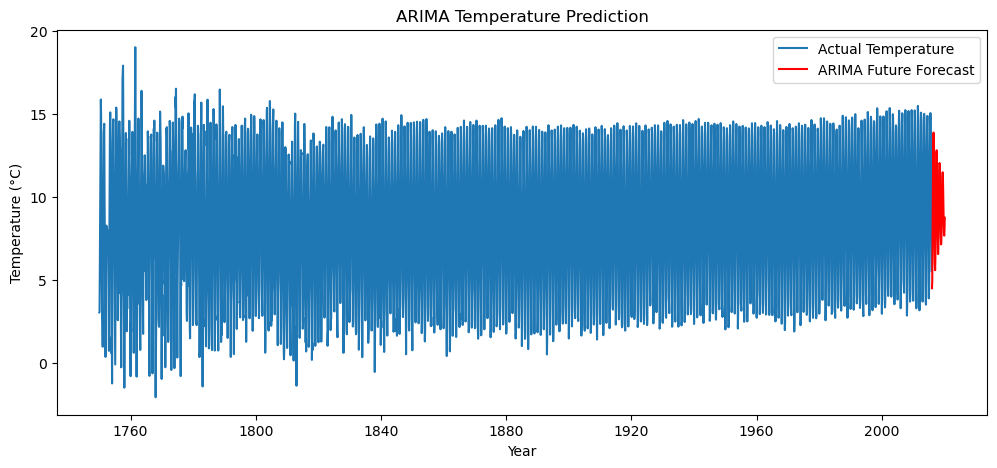

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_excel("/Users/monicachaganti/Desktop/GlobalTemperatures.xls")
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')  
df.set_index("Date", inplace=True)  

print(df.index)  

df_temp = df["LandAverageTemperature"].dropna()

df_temp = df_temp.sort_index()

model = ARIMA(df_temp, order=(5,1,0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=50)

future_dates = pd.date_range(start=df_temp.index[-1], periods=50, freq='M')

plt.figure(figsize=(12,5))
plt.plot(df_temp.index, df_temp, label="Actual Temperature")
plt.plot(future_dates, forecast, label="ARIMA Future Forecast", color="red")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.title("ARIMA Temperature Prediction")
plt.show()


PROPHET

16:10:33 - cmdstanpy - INFO - Chain [1] start processing
16:10:33 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


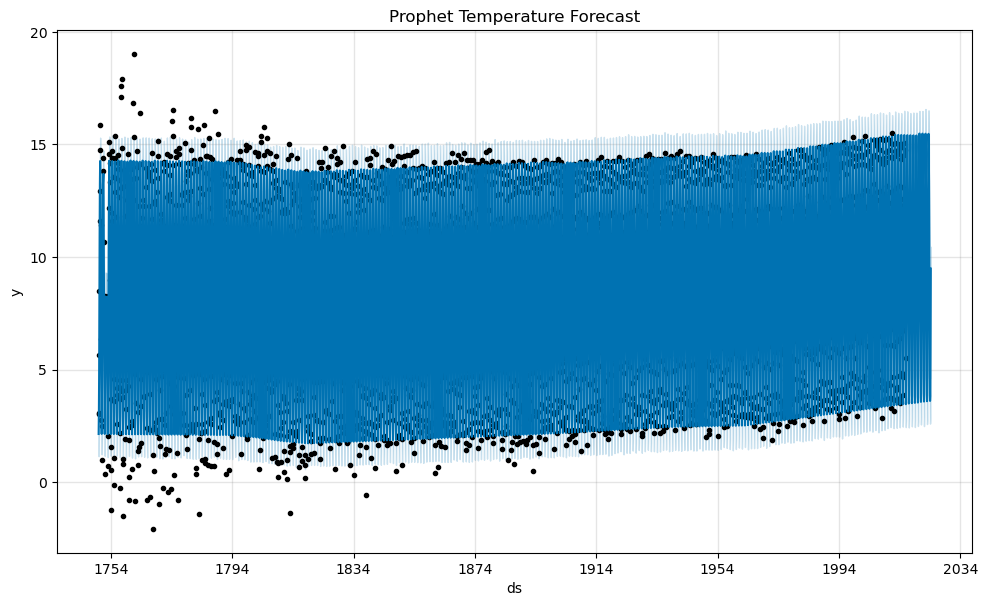

In [38]:
from prophet import Prophet

prophet_df = df.reset_index()[["Date", "LandAverageTemperature"]].dropna()
prophet_df.columns = ["ds", "y"]

prophet_model = Prophet()
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=100, freq='M')
forecast = prophet_model.predict(future)

prophet_model.plot(forecast)
plt.title("Prophet Temperature Forecast")
plt.show()


Random Forest Regressor

Random Forest MSE: 22.807742748351437


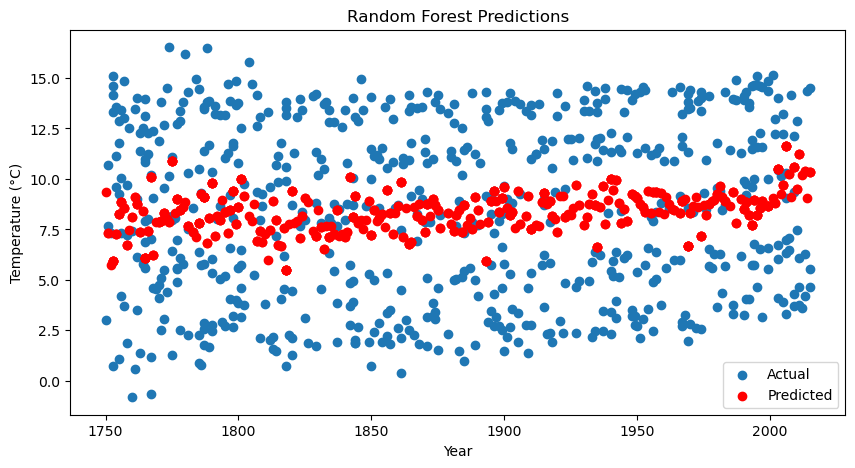

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df["Year"] = df.index.year
df_clean = df[["Year", "LandAverageTemperature"]].dropna()

X = df_clean[["Year"]]
y = df_clean["LandAverageTemperature"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest MSE: {mse}")

plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred, label="Predicted", color="red")
plt.legend()
plt.title("Random Forest Predictions")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


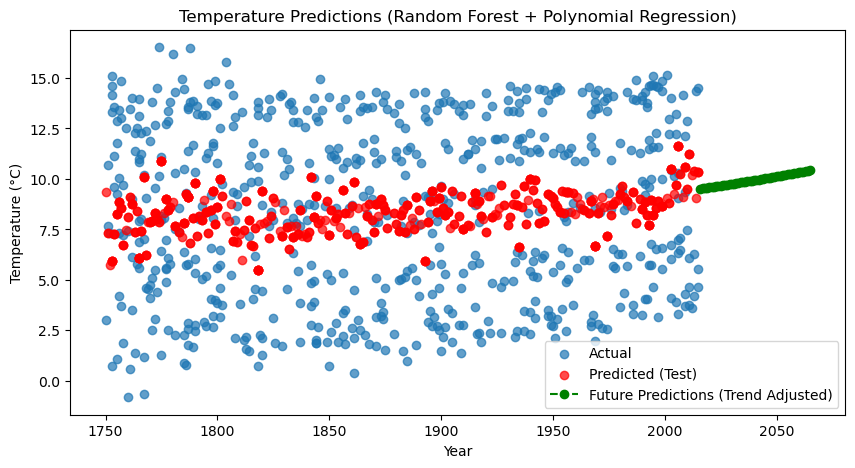

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

file_path = "/Users/monicachaganti/Desktop/GlobalTemperatures.xls"
df = pd.read_excel(file_path)
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')  
df.set_index("Date", inplace=True) 

df["Year"] = df.index.year
df_clean = df[["Year", "LandAverageTemperature"]].dropna()

X = df_clean[["Year"]]
y = df_clean["LandAverageTemperature"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

poly = PolynomialFeatures(degree=2) 
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

future_years = np.arange(df_clean["Year"].max() + 1, df_clean["Year"].max() + 51).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_predictions = poly_model.predict(future_years_poly)

plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, label="Actual", alpha=0.7)
plt.scatter(X_test, rf_model.predict(X_test), label="Predicted (Test)", color="red", alpha=0.7)
plt.plot(future_years, future_predictions, label="Future Predictions (Trend Adjusted)", color="green", linestyle="dashed", marker="o")
plt.legend()
plt.title("Temperature Predictions (Random Forest + Polynomial Regression)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()


XGBoost

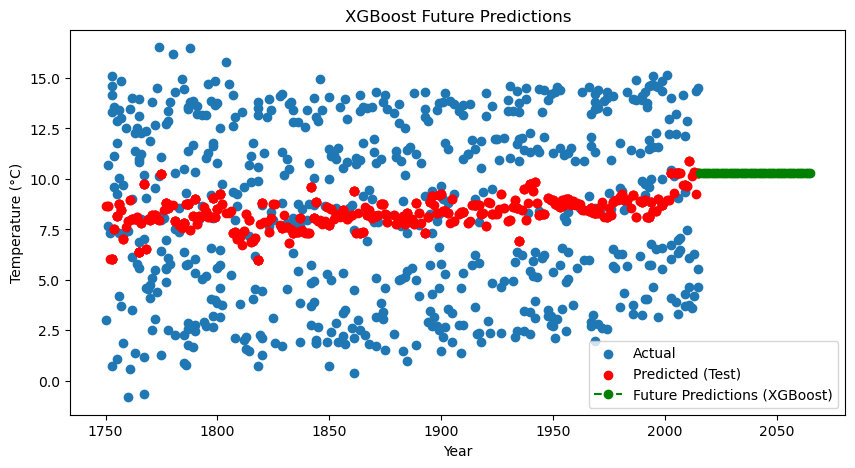

In [46]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

df["Year"] = df.index.year
df_clean = df[["Year", "LandAverageTemperature"]].dropna()

X = df_clean[["Year"]]
y = df_clean["LandAverageTemperature"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

future_years = np.arange(df_clean["Year"].max() + 1, df_clean["Year"].max() + 51).reshape(-1, 1)
future_predictions = xgb_model.predict(future_years)

plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, xgb_model.predict(X_test), label="Predicted (Test)", color="red")
plt.plot(future_years, future_predictions, label="Future Predictions (XGBoost)", color="green", linestyle="dashed", marker="o")
plt.legend()
plt.title("XGBoost Future Predictions")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()


Random Forest Regressor

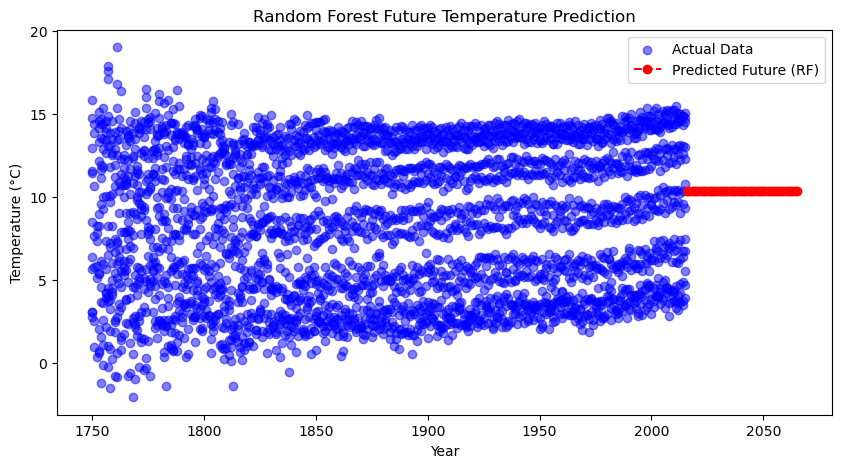

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

file_path = "/Users/monicachaganti/Desktop/GlobalTemperatures.xls"
df = pd.read_excel(file_path)

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

df = df.dropna(subset=["Date"])

df["Year"] = df["Date"].dt.year

df_clean = df[["Year", "LandAverageTemperature"]].dropna()

X = df_clean[["Year"]]
y = df_clean["LandAverageTemperature"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

future_years = pd.DataFrame({"Year": range(2016, 2066)})
future_predictions_rf = rf_model.predict(future_years)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Actual Data", color="blue", alpha=0.5)
plt.plot(future_years, future_predictions_rf, label="Predicted Future (RF)", color="red", linestyle="dashed", marker="o")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Random Forest Future Temperature Prediction")
plt.legend()
plt.show()


In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n📊 {model_name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    return {"Model": model_name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

rf_results = evaluate_model(y_test, rf_model.predict(X_test), "Random Forest Regressor")
xgb_results = evaluate_model(y_test, xgb_model.predict(X_test), "XGBoost")
lr_results = evaluate_model(y_test, lr_model.predict(X_test), "Linear Regression")





📊 Random Forest Regressor Performance:
MAE: 4.2212
MSE: 22.8077
RMSE: 4.7757
R² Score: -0.2307

📊 XGBoost Performance:
MAE: 4.0577
MSE: 21.0561
RMSE: 4.5887
R² Score: -0.1362

📊 Linear Regression Performance:
MAE: 3.7980
MSE: 18.5315
RMSE: 4.3048
R² Score: 0.0001


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_excel("/Users/monicachaganti/Desktop/GlobalTemperatures.xls")
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')  
df.set_index("Date", inplace=True)  

print(df.index) 

df_temp = df["LandAverageTemperature"].dropna()

df_temp = df_temp.sort_index()

train_size = int(len(df_temp) * 0.8)
train, test = df_temp.iloc[:train_size], df_temp.iloc[train_size:]

model = ARIMA(train, order=(5,1,0))  
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

future_dates = test.index  

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test, forecast)

print("\n📊 ARIMA Model Performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

DatetimeIndex(['1750-01-01', '1750-02-01', '1750-03-01', '1750-04-01',
               '1750-05-01', '1750-06-01', '1750-07-01', '1750-08-01',
               '1750-09-01', '1750-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='Date', length=3192, freq=None)

📊 ARIMA Model Performance:
MAE: 3.7003
MSE: 17.3347
RMSE: 4.1635
R² Score: -0.0039


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
